In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("../data/processed/AAPL_backtest_result.csv", parse_dates=["Date"])
df.head()

,Date,Adj Close,Close,High,Low,Open,Volume,short_mavg,long_mavg,signal,positions,daily_return,shifted_signal,strategy_return,cum_strategy_return,cum_market_return,portfolio_value
0,2020-01-02,72.716080,75.087502,75.150002,73.797501,74.059998,135480400,72.716080,72.716080,0,0.0,0.000000,0.0,0.0,1.0,1.000000,10000.0
1,2020-01-03,72.009132,74.357498,75.144997,74.125000,74.287498,146322800,72.362606,72.362606,0,0.0,-0.009722,0.0,-0.0,1.0,0.990278,10000.0
2,2020-01-06,72.582924,74.949997,74.989998,73.187500,73.447502,118387200,72.436045,72.436045,0,0.0,0.007968,0.0,0.0,1.0,0.998169,10000.0
3,2020-01-07,72.241562,74.597504,75.224998,74.370003,74.959999,108872000,72.387424,72.387424,0,0.0,-0.004703,0.0,-0.0,1.0,0.993474,10000.0
4,2020-01-08,73.403633,75.797501,76.110001,74.290001,74.290001,132079200,72.590666,72.590666,0,0.0,0.016086,0.0,0.0,1.0,1.009455,10000.0


In [15]:
df = pd.read_csv("../data/processed/300760.SZ_backtest_result.csv", parse_dates=["Date"])
df.head()

,Date,Adj Close,Close,High,Low,Open,Volume,short_mavg,long_mavg,signal,positions,daily_return,shifted_signal,strategy_return,cum_strategy_return,cum_market_return,portfolio_value
0,2023-01-03,294.021149,311.359985,317.000000,309.000000,315.970001,4468556,294.021149,294.021149,0,0.0,0.000000,0.0,0.0,1.0,1.000000,10000.0
1,2023-01-04,300.716370,318.450012,320.679993,310.079987,311.299988,4226437,297.368759,297.368759,0,0.0,0.022771,0.0,0.0,1.0,1.022771,10000.0
2,2023-01-05,302.321655,320.149994,323.489990,315.200012,320.989990,5128916,299.019725,299.019725,0,0.0,0.005338,0.0,0.0,1.0,1.028231,10000.0
3,2023-01-06,300.385803,318.100006,323.959991,316.000000,321.119995,4364555,299.361244,299.361244,0,0.0,-0.006403,0.0,-0.0,1.0,1.021647,10000.0
4,2023-01-09,300.895752,318.640015,320.769989,315.970001,318.179993,3531384,299.668146,299.668146,0,0.0,0.001698,0.0,0.0,1.0,1.023381,10000.0


## Equity Curve

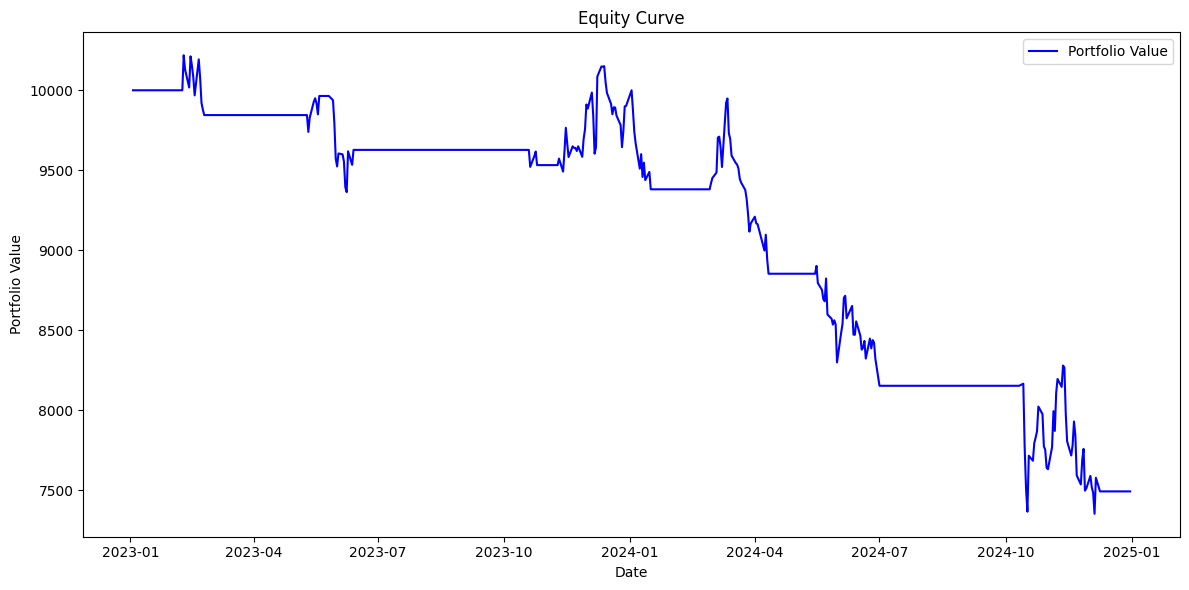

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(df["Date"], df["portfolio_value"], label="Portfolio Value", color="blue")
plt.title("Equity Curve")
plt.xlabel("Date")
plt.ylabel("Portfolio Value")
plt.legend()
plt.tight_layout()
plt.show()

## Drawdown Curve

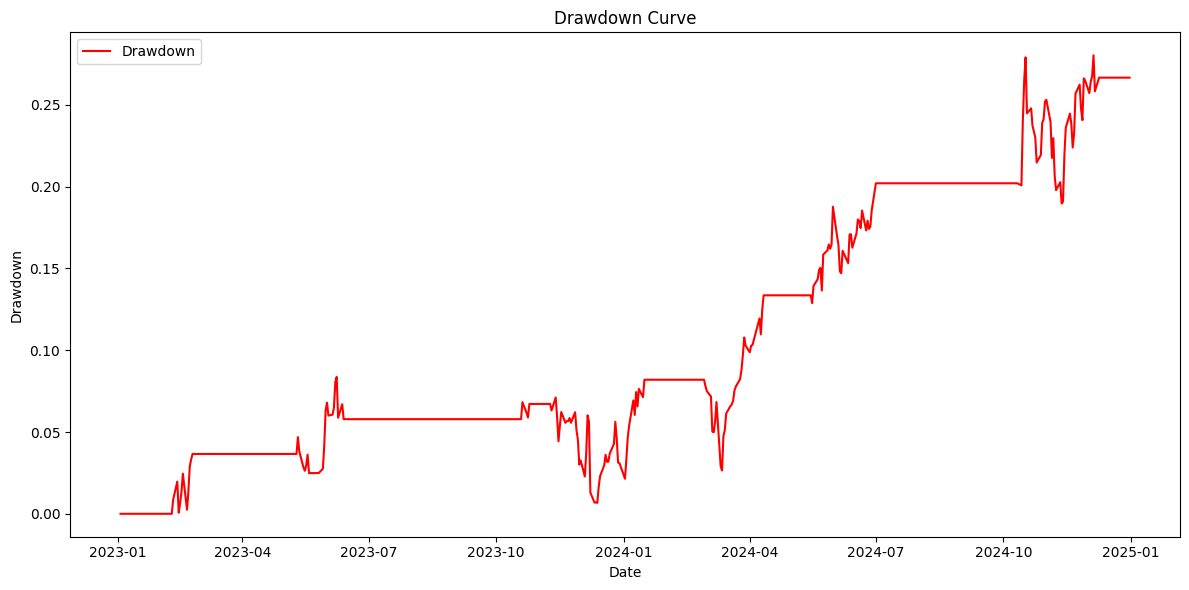

In [17]:
if "drawdown" not in df.columns:
    df["peak"] = df["portfolio_value"].cummax()
    df["drawdown"] = (df["peak"] - df["portfolio_value"]) / df["peak"]

plt.figure(figsize=(12, 6))
plt.plot(df["Date"], df["drawdown"], label="Drawdown", color="red")
plt.title("Drawdown Curve")
plt.xlabel("Date")
plt.ylabel("Drawdown")
plt.legend()
plt.tight_layout()
plt.show()

## Trade Signal Overlay on Price Chart

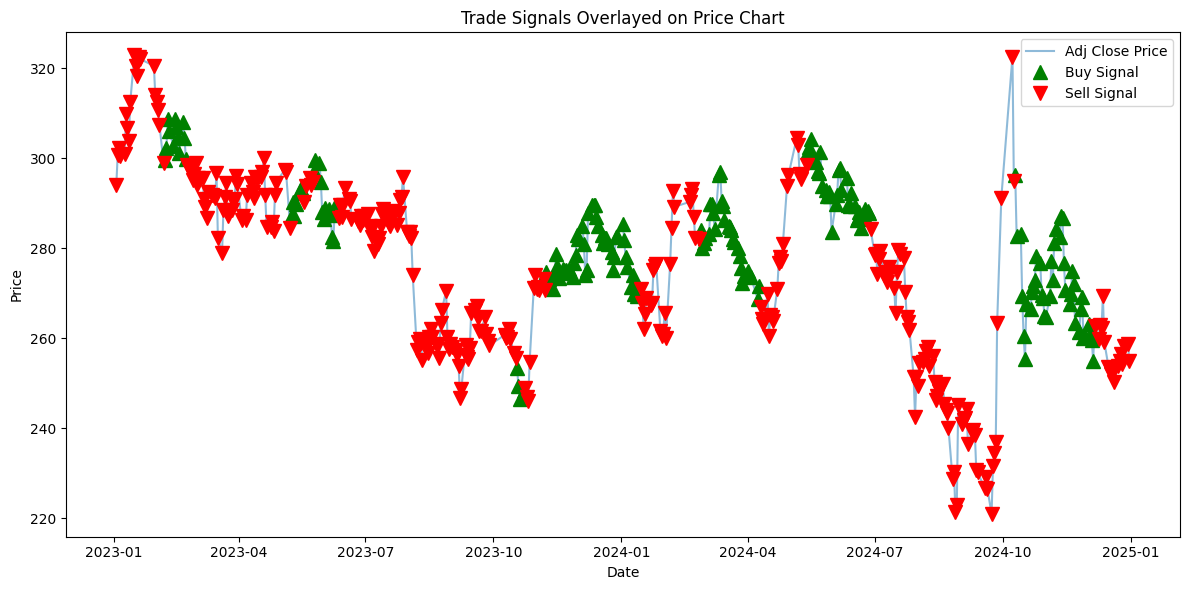

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(df["Date"], df["Adj Close"], label="Adj Close Price", alpha=0.5)

buy_signals = df[df["signal"] == 1]
sell_signals = df[df["signal"] == 0]

plt.plot(buy_signals["Date"], buy_signals["Adj Close"], "^", markersize=10, color="green", label="Buy Signal")
plt.plot(sell_signals["Date"], sell_signals["Adj Close"], "v", markersize=10, color="red", label="Sell Signal")

plt.title("Trade Signals Overlayed on Price Chart")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.tight_layout()
plt.show()

## Daily Returns Distribution

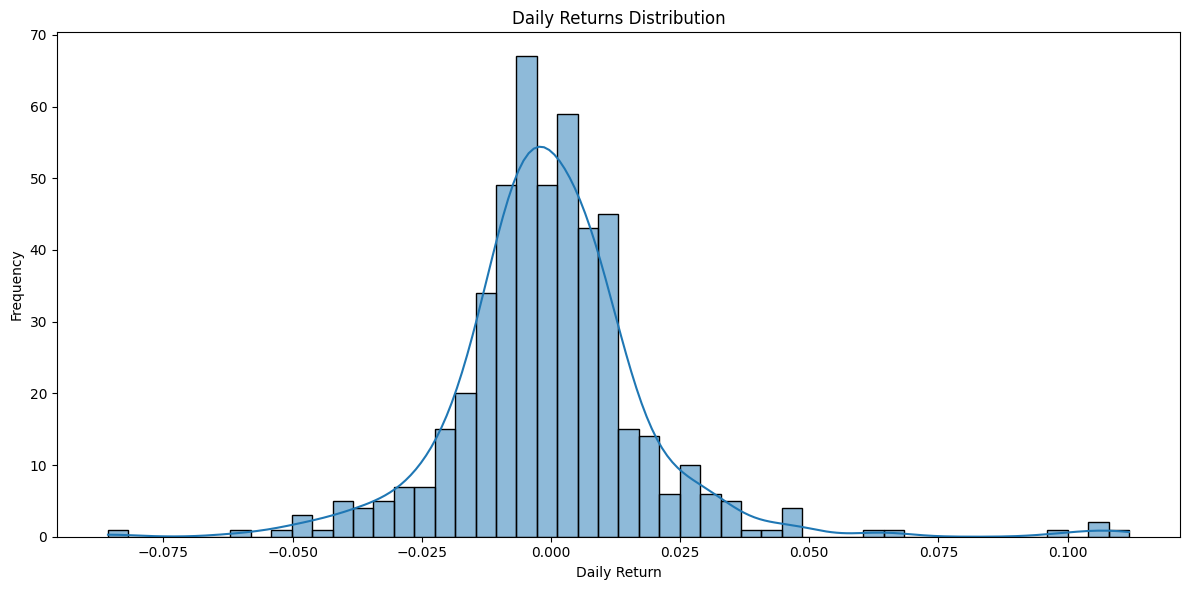

In [19]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(df["daily_return"], bins=50, kde=True)
plt.title("Daily Returns Distribution")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()